# <img style="float: left; padding-right: 10px; width: 150px" src="../../imagini/unitbv2.png"> SIIPA2020- Știința Explorării și Exploatării Datelor - ADS1  






## <center>Curs 9 - Regresie Logistică</center>
**Universitatea Transilvania**<br>
**Semestrul I, 2020-2021**<br>
**Instructor:** Conf. univ. dr. Teodor &Scedil;tefan B&icirc;ldea<br>
**Contact:** teodor.bildea@unitbv.ro<br>


In [44]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import sklearn as sk

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from sklearn import linear_model

# Recapitulare

Cursul trecut am vorbit despre regresia liniara.

 > Am vazut cum arata:

- regresia liniara cu un predictor
- regresia liniara cu mai multi predictori

 > Am vazut cum putem evalua un model de predictie (MSE/RMSE si R$^2$) si cum putem compara doua modele de predictie.
 
 > Am vazut in cazul mai multor predictori cum putem determina puterea de predictie. 
 
 > Am construit modelul multiliniar pas cu pas - selectand pe rand cate un predictor si excluzand pe rand cate un predictor.
 
<b>NOTA</b>: Desi nu am prezentat exemple in aceasta directie, regresia liniara sufera la overfit (cand predictorii sunt corelati).
 
 > In final am introdus variantele mai recente de regresori care permit overfit si au beneficiul ca modelul final este robust la overfit:
     - Lasso, Ridge regression si Elastic Net (toate sunt in librariile sklearn)
 
 
 ## De retinut la regresia liniara
 
 > Aspecte `pozitive`
- formula matematica, nu necesita algoritmica complexa de rezolvare
- explicatii intuitive si legatura directa cu corelatia in cazul unui singur predictor
- bun atat pentru inferenta cat si pentru predictie
 
 > Aspecte `negative`
- sensibil la overfit - necesita o selectare amanuntita a predictorilor necorelati
<b>Nota</b>: aceasta problema a fost rezolvata cu Ridge regression
- ca orice model statistic, nu este data driven - adica nu invata din date ci porneste de la presupunerea ca intre date exista legaturi liniare
     
 > Datorii:
      `Efectul standardizarii`    
- Un coeficient are interpretarea: modificarea cu 1 a valorii variabilei produce o modificare a valorii y cu un număr de unităţi egal cu valoarea coeficientului. Deoarece scalele de măsură sunt, în general, diferite, interpretarea în acest sens a coeficienţilor poate deforma imaginea importanţei variabilelor independente în model. Din acest motiv se introduc coeficienţii de regresie standardizaţi definiţi drept coeficienţii de regresie estimaţi ai modelului în care noile variabilele $\tilde x_i$ sunt standardizate: $\tilde x_i = \frac{x_i-\bar x_i}{\sigma_i}$
  

In [45]:
df_heart = pd.read_csv('data/Heart.csv',header = 0).iloc[:,1:]

In [46]:
df_heart.head()

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0      normal  Yes  
2      2  2.0  reversable  Yes  
3      3  0.0      normal   No  
4      1  0.0      normal   No

R squared training 0.155
beta0:  203.86338954311805
beta1:  [-0.99664183]


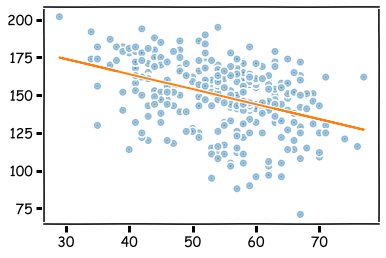

In [47]:
data_x = df_heart['Age']
data_y = df_heart['MaxHR']


reg = sk.linear_model.LinearRegression(fit_intercept=True)

model = reg.fit(data_x.values.reshape(-1,1), data_y)


print('R squared training',round(reg.score(data_x.values.reshape(-1,1),data_y),3))

print('beta0: ', reg.intercept_)
print('beta1: ', reg.coef_)

y_ = reg.predict(data_x.values.reshape(-1,1))
plt.plot(df_heart.Age, df_heart.MaxHR, 'o', alpha=0.4)
plt.plot(df_heart.Age, y_)
#plt.ylim(-0.1,1.1)
plt.show()

# Tema 0:
    
    Cum se interpreteaza coeficientii de regresie?
    
 Incercam sa vedem legatura intre puls maxim si varsta. Predictorul este vârsta, variabila de prognozat: pulsul maxim. 

Explicați cum se interpretează $\beta_1$.

## Explicația voastra aici (dublu click pentru editare):
   
$\beta_1$:

<b>Bonus</b> - cum se interpretează $\beta_0$:

# De ce nu putem clasifica cu regresie liniara?

## Exemplu - data legate de sanatate inimii

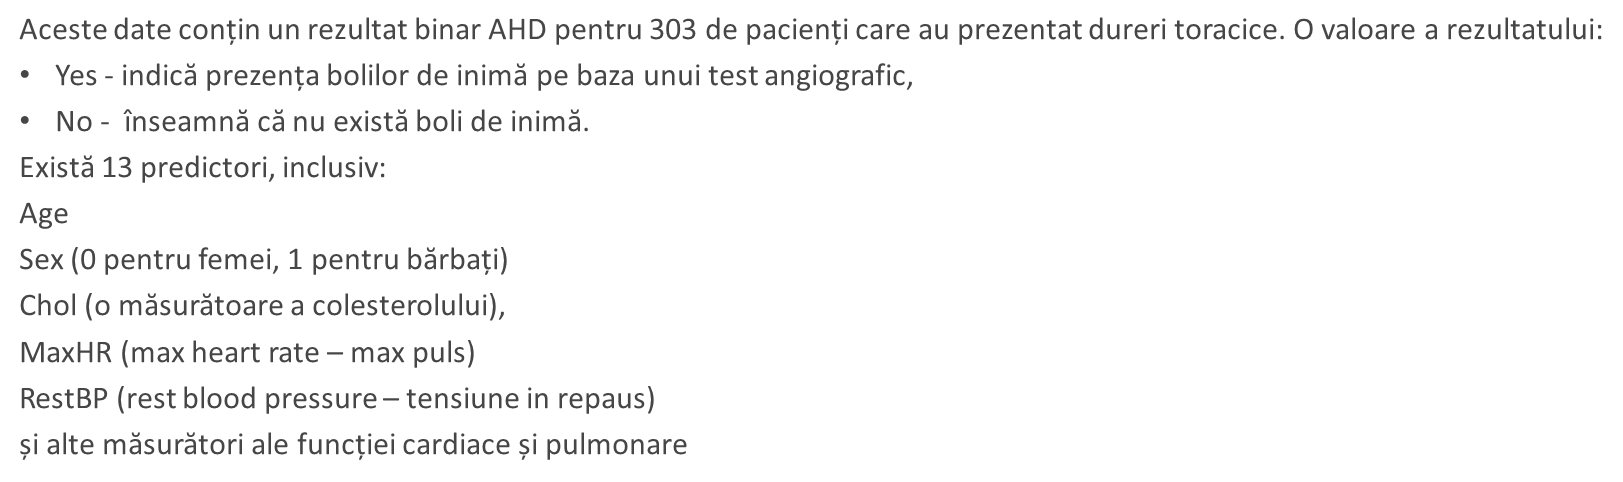

Transformam AHD in  variabila numerica pentru a incerca regresia:

In [48]:


df_heart['AHD'] = 1*(df_heart['AHD'] == "Yes")

df_heart.AHD.head(10)


0    0
1    1
2    1
3    0
4    0
5    0
6    1
7    0
8    1
9    1
Name: AHD, dtype: int32

Sa observam o diagrama de imprastiere MaxHR si AHD:

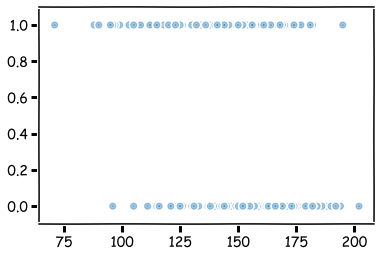

In [49]:
plt.plot(df_heart.MaxHR, df_heart.AHD, 'o', alpha=0.4)
plt.ylim(-0.1,1.1)
plt.show()


# Clasificare

   > Până în acest moment, metodele pe care le-am văzut s-au concentrat în jurul modelării și a prezicerii unei variabile de răspuns cantitativ (ex. Pretul unei masini, pretul unei case etc.). Regresia liniară (și Ridge, LASSO, etc) funcționează bine în aceste situații
   
   
   > Când variabila de răspuns este categorială, atunci problema nu mai este numită problemă de regresie, ci este în schimb etichetată ca o problemă de clasificare.
   
   
   > Scopul este clasificarea fiecărei observații într-o categorie (numită si clasă sau cluster) definită de $Y$, pe baza unui set de variabile predictor $X$.


   > Altel spus încercăm să modelăm  $P(AHD = 'Yes')$ sau, în graficul de mai sus, $P(𝑦 = 1)$

Adaugăm la graficul de mai sus dreapta de regresie:

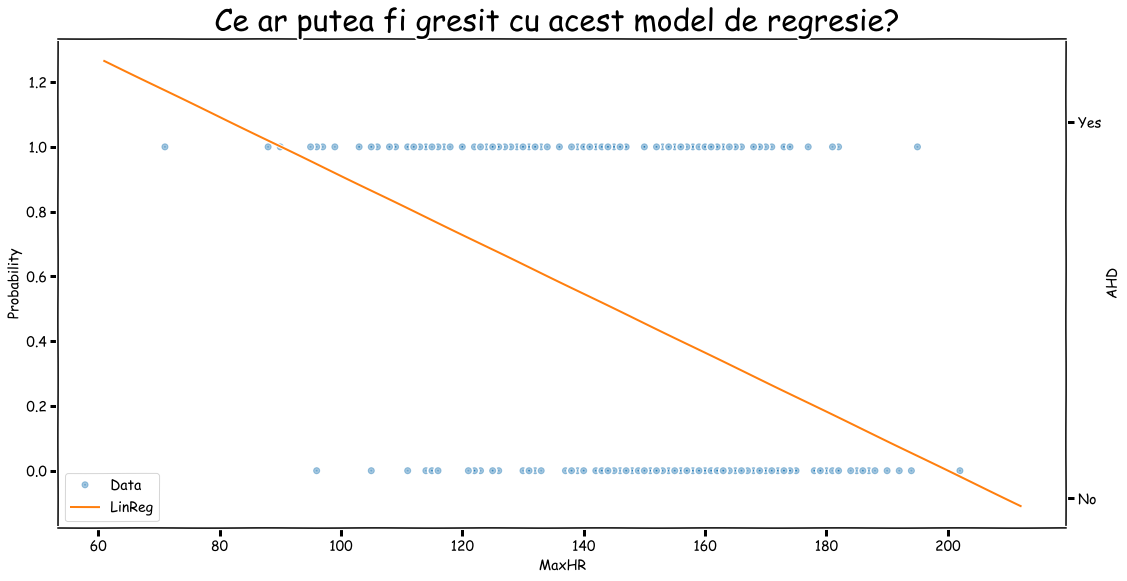

In [50]:

fig = plt.figure(figsize=(20,10))
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

host = fig.add_subplot(111)

par1 = host.twinx()

host.set_xlabel("MaxHR")
host.set_ylabel("Probability")


par1.set_ylabel("AHD")

color1 = plt.cm.viridis(0)

data_x = df_heart['MaxHR']
data_y = df_heart['AHD']

regr = sk.linear_model.LinearRegression(fit_intercept=True)

regr.fit(data_x.values.reshape(-1,1), data_y)


# Make predictions using the testing set
x=np.linspace(np.min(data_x)-10,np.max(data_x)+10)
y_ = regr.predict(x.reshape(-1,1))

host.plot(data_x, data_y, 'o' ,alpha=0.4, label='Data')

host.plot(x, y_, label='LinReg')
host.legend(loc=3)

labels = ['No', 'Yes']

# You can specify a rotation for the tick labels in degrees or with keywords.
par1.set_yticks( [0.061, 0.83])
par1.set_yticklabels(labels)
par1.set_title('Ce ar putea fi gresit cu acest model de regresie? ', fontsize=30)
plt.show()

#plt.savefig('fig/FittingLR.png', dpi=300, transparent=True)

Problema principală este că se pot obține valori fara sens pentru $y$. 

Deoarece aceasta este modelarea $P(𝑦 = 1)$, valorile pentru $\hat{y}$ sub 0 și peste 1 ar fi în contradicție cu măsura naturală pentru $y$. 

Regresia liniară poate duce la această problemă.


## De la regresie liniara la regresie logistica 

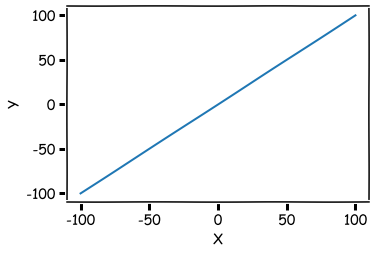

In [51]:
fig, ax1 = plt.subplots()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

x = np.linspace(-100, 100, 100)
y = x
yl = 1/(1+np.exp(-y))
ax1.plot(x,y, label='Y=X')



ax1.set_xlabel('X')
ax1.set_ylabel('Y');

#ax1.legend()

#plt.savefig('fig/LinR.png', dpi=300, transparent=True)


Regresia ne da o dreapta. Pentru a modela probabilitatile, vom avea nevoie de o transformare a variabilei raspuns.

Regresia logistică abordează problema estimării unei probabilități, $P(y = 1)$, care să se afle în limitele $[0,1]$. Modelul de regresie logistică folosește o funcție, numită funcție logistică, pentru modelul $P(y = 1)$:
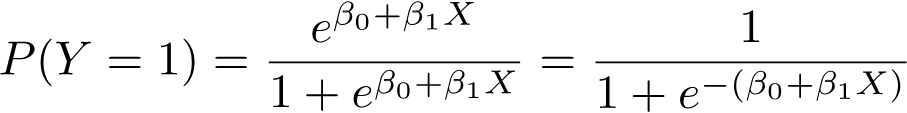

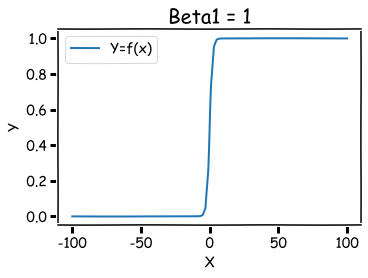

In [52]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


plt.plot(x,yl, label='Y=f(x)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.title('Beta1 = 1', fontsize = 20);
#plt.savefig('fig/LogR.png', dpi=300, transparent=True)


Drept urmare, modelul va prezice $P(y = 1)$ cu o curbă în formă de 𝑆, care este forma generală a funcției logistice.

$\beta_{0}$  deplasează curba spre dreapta sau stânga cu c=−$\frac{\beta_{0}}{\beta_{1}}$  .

$\beta_{1}$  controlează cât de abruptă este curba în formă de 𝑆. 

Distanța de la ½ la aproape 1 sau ½ la aproape 0 la ½ este $\frac{2}{\beta_{1}}$  

Notă: dacă $\beta_{1}$ este pozitiv, atunci $P(y = 1)$ trece de la 0 pentru valori mici ale lui $𝑋$ la 1 pentru valori mari de 𝑋 și dacă $\beta_{1}$ este negativ, atunci $P(y = 1)$ are asociere opusă.


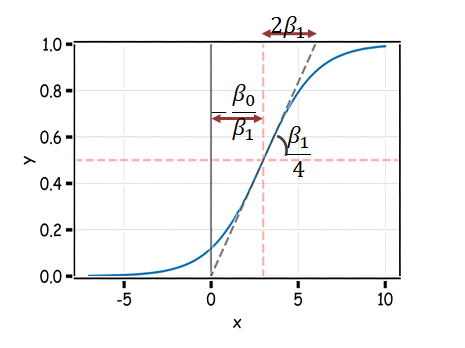

### Efectul coefficientilor in functia logistica

NOTĂ: ca să funcționeze grafica de mai jos este nevoie să instalati
- imagemagick (http://www.besavvy.com/documentation/4-5/Editor/031350_installimgk.htm)
- notați calea în care s-a instalat mai jos in celulă: 'C:/Program Files/ImageMagick-7.0.10-Q16-HDRI/ffmpeg.exe'

In [53]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.patch.set_alpha(1.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

line,  = ax.plot(x,yl, label=r'$Y=\frac{1}{1+e^{-(X+\beta_0) }}$')
plt.xlabel('X')
plt.ylabel('Y')
#plt.legend(loc=5)


def update(i):
    b1=2*i
    label = r'$\beta_1=$ {0}'.format(np.round(b1, decimals=2))
    #print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata( 1/(1+np.exp(-b1*x)))
    ax.set_title(label);
    return line, ax


# FuncAnimation will call the 'update' function for each frame; here
# animating over 10 frames, with an interval of 200ms between frames.
anim = FuncAnimation(fig, update, frames=np.arange(.2, -.2,-.03), interval=200, blit=False)

anim.save('LogBeta1.gif', dpi=120, writer='imagemagick',  
          savefig_kwargs={'transparent': True, 'facecolor': '#F9F9F9'})

plt.rcParams['animation.ffmpeg_path'] = 'C:/Program Files/ImageMagick-7.0.10-Q16-HDRI/ffmpeg.exe'
plt.close(anim._fig)

# Call function to display the animation

HTML(anim.to_html5_video())


## Functia logit 

Cu un pic de algebra, modelul logistic poate fi rescris ca:


$ logit(x) = ln(\frac{P(Y=1|X=x)}{1-P(Y=1|X=x)}) = \beta_{0} + \beta_{1} \times x$

Să reținem că $\frac{P(Y=1|X=x)}{1-P(Y=1|X=x)}$, se numește <b>șansă (odds)</b>.

Regresia logistică se spune că modelează log odds cu o funcție liniară a predictorilor sau a caracteristicilor, $X$. 

Aceasta ne oferă interpretarea naturală a estimărilor similare cu regresia liniară: 
- o modificare a unei unități în $X$ este asociată cu o modificare  $\beta_{1}$ in log-odds pentru clasa $𝑌=1$; 
- altfel spus, <b>o schimbare de o unitate în $X$ este asociată cu o modificare de $e^{\beta_{1}}$ in șansa (definită mai sus) ca $𝑌=1$.</b> 


No handles with labels found to put in legend.


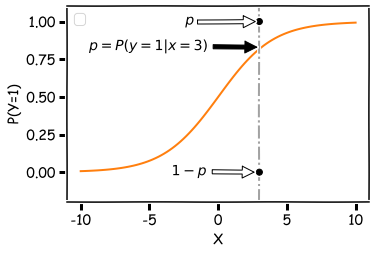

In [54]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)


plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


x = np.linspace(-10, 10, 100)
y = x
yl = 1/(1+np.exp(-0.5*y))

#plt.plot(x,yl, label=r'$P(Y=1)=\frac{1}{1+e^{-X\beta}}$')
plt.plot(x,yl)
plt.xlabel('X')
plt.ylabel('P(Y=1)')
plt.legend()
plt.ylim((-0.2, 1.1))
#plt.savefig('fig/Likelihood1.png', dpi=300, transparent=True)

### FRAME 2 

plt.axvline(x=3, color='#A2A2A2', ls='-.')
#plt.savefig('fig/Likelihood2.png', dpi=300, transparent=True)

### FRAME 3
plt.annotate(r'  $P(y=1|x=3)$', xy=(3, .83),\
             xytext=(-8, .81),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.savefig('Likelihood3.png', dpi=300, transparent=True)

### FRAME 4

plt.annotate(r'  $p=P(y=1|x=3)$', xy=(3, .83),\
             xytext=(-10, .81),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.savefig('Likelihood4.png', dpi=300, transparent=True)


### FRAME 5

#plt.clf()
plt.ylim((-0.2, 1.1))
plt.plot(x,yl)
plt.xlabel('X')
plt.ylabel('P(Y=1)')
plt.axvline(x=3, color='#A2A2A2', ls='-.')
coinf = np.random.binomial(1, 0.7, size=1)
plt.plot( [3], [0], 'ko')
plt.plot( [3], [1], 'ko')

plt.annotate(r'  $p$', xy=(2.7, 1),\
             xytext=(-3, 0.98),
            arrowprops=dict(facecolor='white', shrink=0.0),
            )
plt.annotate(r'  $1-p$', xy=(2.8, .00),\
             xytext=(-4, -.02),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
plt.savefig('Likelihood5.png', dpi=300, transparent=True);

#plt.show()



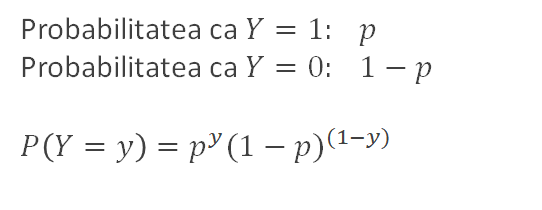

unde:
$p=P(𝑌=1|X=x)$ și, prin urmare, $p$ depinde de eșantionul $X$.


# Estimarea parametrilor beta

Nu mai exista forma inchisa, se minimizeaza cu tehnici de aproximare care sunt dincolo de scopul cursului.

Functia care se minimizeaza:

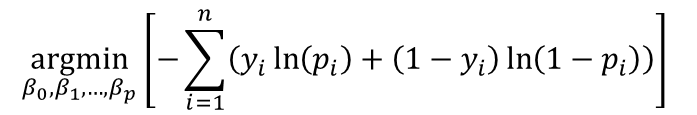

unde:
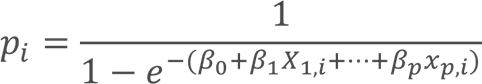

## Revenim la exemplu

Vrem sa estimam probabilitatea $AHD = 1$ folosind predictorul MaxHR.

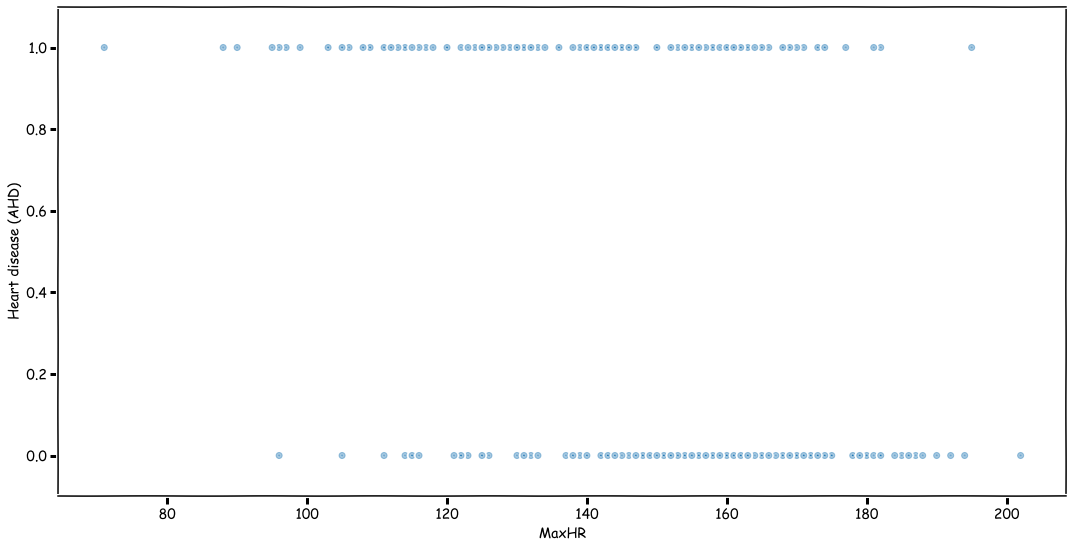

In [55]:
from sklearn import linear_model

fig = plt.figure(figsize=(20,10))
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

plt.ylim((-0.1, 1.1))


plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")


data_x = df_heart['MaxHR']
data_y = df_heart['AHD']

plt.plot(data_x, data_y, 'o' ,alpha=0.4, label='Data')
plt.show()



Asa cum ne-am obisnuit, avem de efectuat 2 pasi:
    
    - fit (antrenament, sau estimare parametrii pe date de antrenament)
    - predictie
    
Despre parametrul C de mai jos vom vorbi imediat.

Există diferite variante de modelare logistic la acest set de date în Python.

Cea mai directă este sklearn via linear_model.LogisticRegression.

In [56]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=100000, fit_intercept=True,solver='lbfgs')
logreg.fit(data_x.values.reshape(-1,1), data_y);

print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[-0.04341112]]
Estimated beta0: 
 [6.3249492]


Sa inspectam modelul logistic rezultat

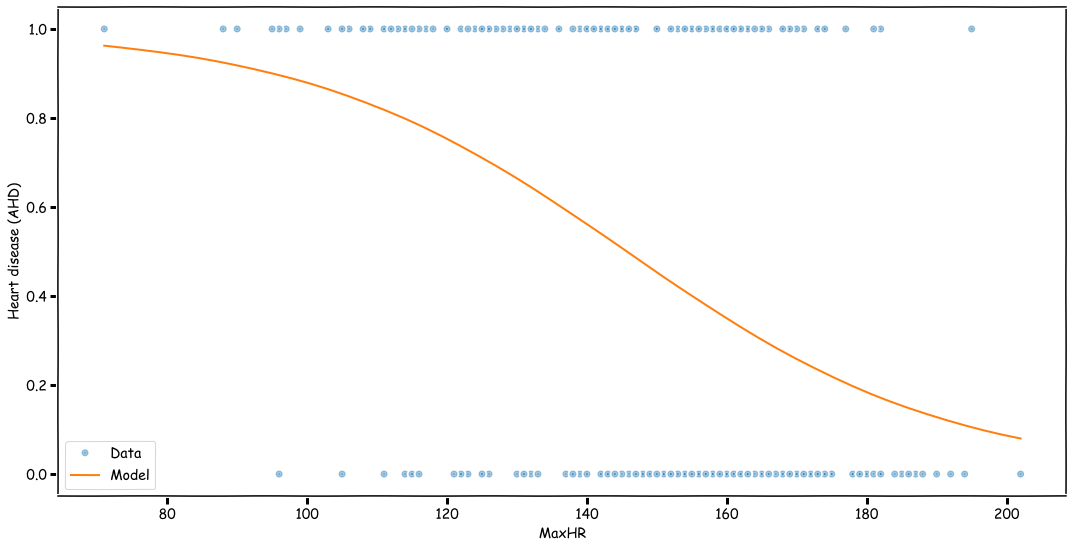

In [57]:

fig = plt.figure(figsize=(20,10))
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


x=np.linspace(np.min(data_x),np.max(data_x))
yhat = logreg.predict_proba(x.reshape(-1,1))[:,1]
plt.plot(data_x, data_y, 'o' ,alpha=0.4, label='Data')
plt.plot(x,yhat, label='Model')
plt.legend()

plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")

plt.savefig('FittingLogR2.png', dpi=300, transparent=True)

## TEMA 1

Răspundeți la câteva întrebări:
1. Scrieți modelul de regresie logistică pentru functia de mai sus.
2. Interpretati $\widehat{\beta}_{1}$.
3. Estimați probabilitatea de boala cardiaca pentru cineva cu MaxHR≈200.
4. Dacă ar fi să folosim acest model pur pentru clasificare, cum am face? 

## Predictori categoriali
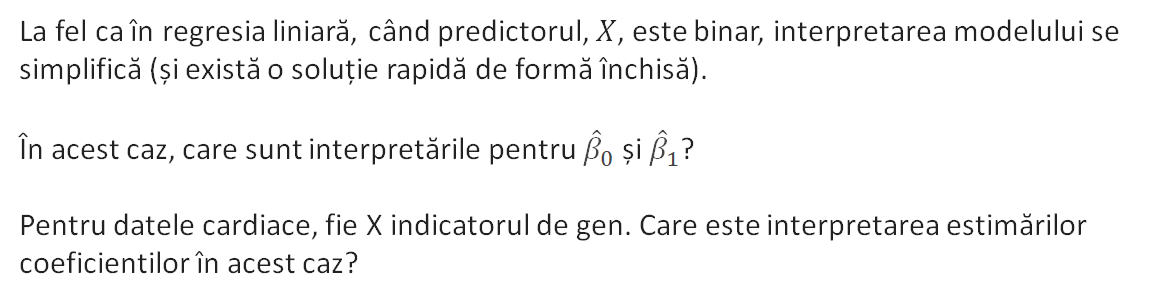

### INDICAȚIE:
$X$ nu ia decât două valori, 0 sau 1. Deci $P(Y=1|X=x)$ nu are decât două posibilități: cea pentru $X = 0$ și cea pentru $X = 1$.

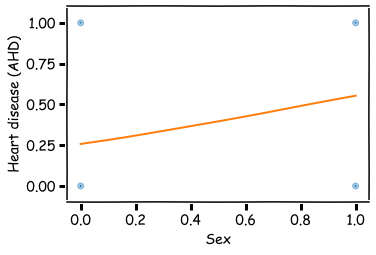

Estimated beta1: 
 [[1.27219333]]
Estimated beta0: 
 [-1.0577853]


In [58]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

plt.ylim((-0.1, 1.1))

plt.xlabel("Sex")
plt.ylabel("Heart disease (AHD)")


data_x = df_heart['Sex']
data_y = df_heart['AHD']
logreg.fit(data_x.values.reshape(-1,1), data_y);

x=np.linspace(np.min(data_x),np.max(data_x))
yhat = logreg.predict_proba(x.reshape(-1,1))[:,1]

plt.plot(data_x, data_y, 'o' ,alpha=0.4, label='Data')
plt.plot(x,yhat, label='Model')
plt.show()
print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

In [59]:
print(1/(1+np.exp(-logreg.intercept_)), 1/(1+np.exp(-logreg.intercept_-logreg.coef_)))

[0.25773291] [[0.5533976]]


In [60]:
data_x = df_heart['Sex']
data_y = df_heart['AHD']

idx0 = np.where(data_x.values==0)
idx1 = np.where(data_x.values==1)

print("procent femei cu HD", data_y.values[idx0].sum()/idx0[0].shape)
print("procent barbati cu HD", data_y.values[idx1].sum()/idx1[0].shape)

pd.crosstab(df_heart['Sex'],df_heart['AHD'])
print("Coincidenta?! NU CRED!")

procent femei cu HD [0.25773196]
procent barbati cu HD [0.55339806]
Coincidenta?! NU CRED!


# Sunt posibile doua extensii: 
- marim numarul de predictori - Regresie Logistica Multipla
- marim numarul de clase - Regresie Logistica Multinomiala

Cea mai generala forma este cea a Regresiei Logistice Multiple Multinomiale (sau cu clase/cateorii multiple)

## Regresie Logistica Multipla

In [61]:
data_x = df_heart[['MaxHR','Sex']]
data_y = df_heart['AHD']

logreg.fit(data_x, data_y);


print('Estimated beta1, beta2: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1, beta2: 
 [[-0.04508908  1.40621576]]
Estimated beta0: 
 [5.60186105]


In [62]:
# introducem un termen de interactiune (ceea ce nu am incercat la regresie liniara...)

df_heart['Interaction'] = df_heart.MaxHR * df_heart.Sex 

data_x = df_heart[['MaxHR','Sex', 'Interaction']]
data_y = df_heart['AHD']

logreg = LogisticRegression(C=100000, fit_intercept=True, solver='lbfgs')
logreg.fit(data_x, data_y);


print('Estimated beta1, beta2, beta3: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1, beta2, beta3: 
 [[-0.02659135  5.41504863 -0.02707095]]
Estimated beta0: 
 [2.90189609]


# Tema 2:
Construiti un model logistic cu toti predictorii numerici, 2 clase pentru datele din tema.

# Clasificare cu Regresia Logistica
- antrenament (estimare parametrii)
- predictii

Cum putem folosi un model de regresie logistică pentru a efectua clasificarea?
Adică, cum putem prezice când $𝑌 = 1$ vs. $𝑌 = 0$?

Am menționat anterior, putem clasifica toate observațiile pentru care $\hat{P}(𝑌 = 1) ≥0.5$ să fie în grupul asociat cu $𝑌 = 1$ și apoi să asociem toate observațiile pentru care $\hat{P}(𝑌 = 0) <0.5$ cu grupul cu $𝑌 = 0$.

Utilizarea unei asemenea abordări defineste <b>clasificatorul standard Bayes</b>.
Clasificatorul Bayes adoptă abordarea care atribuie fiecare observație clasei cele mai probabile, având în vedere valorile sale de predictor

## Evaluarea unui model de clasificare:


## Matrici de confuzie 

In general clasa prevalenta in setul de antrenament va fi etichetata cu 1 si este adesea numita `clasa pozitiva` iar cealalta cu 0 - `clasa negativa`. Algoritmul va genera rezulta asociind o eticheta prognozata 1 sau 0 unei inregistrari din setul de antrenament (in pasul de `fit`) si din setul de test (in pasul de `predict`).

Există 2 tipuri majore de erori în problemele de clasificare bazate pe un rezultat binar. Sunt:

 > `Fals positive`: prezicerea incorectă $\hat{𝑌}= 1$ atunci când este cu adevărat în $𝑌 = 0$.
 
 > `Fals negative`: prezicerea incorectă 𝑌 ̂ = 0 atunci când este cu adevărat în 𝑌 = 1.

Succesul pe de alta parte se masoara in:
 
 > `True positive`: prezicerea corectă $\hat{𝑌}= 1$ atunci când este cu adevărat în 𝑌 = 1.
 
 > `True negative`: prezicerea corectă $\hat{𝑌}= 0$ atunci când este cu adevărat în 𝑌 = 0.

Pentru cele patru notiuni se folosesc atat valorile efective, cat si o sumedenie de metrici derivate (sursa https://en.wikipedia.org/wiki/Confusion_matrix):
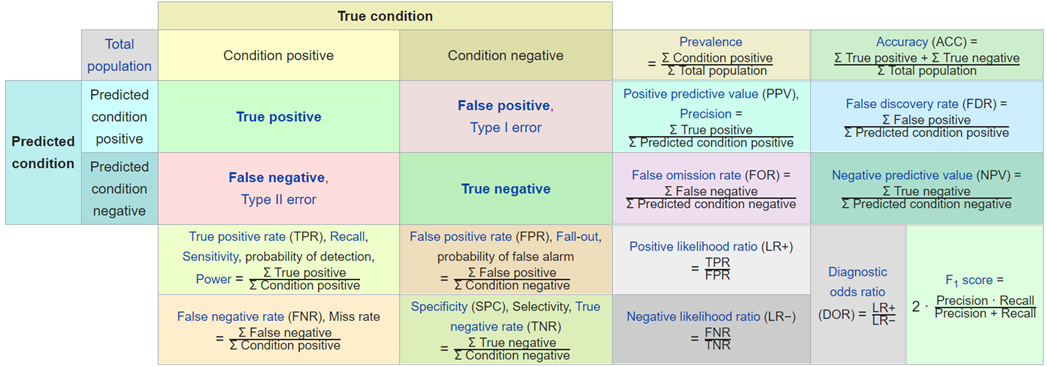

In particular sunt folosite frecvent in algoritmii de prognoza metricile

> Recall/True positive rate/Sensitivity: `TPR/Recall`$ = \frac{TP}{TP+FN}$ 

> Precision/Positive Predicted Value: `Precision`$ = \frac{TP}{TP+FP}$

> `F-Score`: F$_\beta = (1+\beta^2)\cdot \frac{Precision\cdot Recall}{\beta^2\cdot Precision+Recall}$
In particula $\beta =1$ si $F_1$ este media armonica intre Precision si Recall.

Rezultatele unui algoritm de clasificare sunt adesea rezumate în două moduri:

1. o matrice de confuzie, numită uneori tabel de contingență
2. curba ROC si aria de sub ea

In [65]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as met

In [68]:
logreg.fit(df_heart[['Sex','MaxHR','Interaction']], df_heart['AHD']);

# Coeficienții
print('Estimare beta1: \n', logreg.coef_)
print('Estimare beta0: \n', logreg.intercept_)

Estimare beta1: 
 [[ 5.41504863 -0.02659135 -0.02707095]]
Estimare beta0: 
 [2.90189609]


In [69]:
#calculating confusion matrices
import numpy as np
yhat = logreg.predict_proba(df_heart[['Sex','MaxHR','Interaction']])[:,1]

print('Media prognozelor de probabilitate este ',np.mean(yhat))

print('Matricea de confuzie cu separarea claselor la 0.5: \n',met.confusion_matrix(df_heart['AHD'], yhat>0.5))
print('Matricea de confuzie cu separarea cl aselor la ',np.mean(yhat),'\n',met.confusion_matrix(df_heart['AHD'], yhat>np.mean(yhat)))
print('Matricea de confuzie cu separarea claselor la 0.75: \n',met.confusion_matrix(df_heart['AHD'], yhat>0.72))

Media prognozelor de probabilitate este  0.45873166575292285
Matricea de confuzie cu separarea claselor la 0.5: 
 [[132  32]
 [ 56  83]]
Matricea de confuzie cu separarea cl aselor la  0.45873166575292285 
 [[122  42]
 [ 47  92]]
Matricea de confuzie cu separarea claselor la 0.75: 
 [[156   8]
 [ 89  50]]


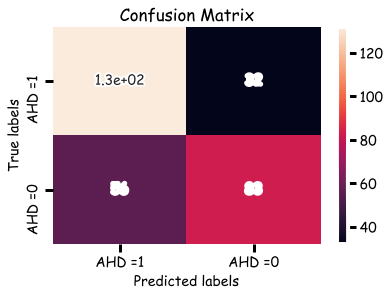

In [70]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = met.confusion_matrix(df_heart['AHD'], yhat>0.5) #confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['AHD =1', 'AHD =0']); ax.yaxis.set_ticklabels(['AHD =1', 'AHD =0']);
plt.show()

# TEMA 3

Calculati Recall, Precision si F1 pentru toate modelele de regresie logistică simpla din datele de mai sus,
cu pragul fixat la 0.5 pentru discriminare intre clase.

Asta inseamna:
- împărțiți datele în date de antrenament și de test
- pentru fiecare din predictori antrenați un model de regresie logistică
- preziceți pe datele de anternament și produceți matricea de confuzie la antrenament 
- preziceti pe datele de test și produceți matricea de confuzie

Calculați Recall, Precision și F1.

În funcție de F1 faceți topul celor mai buni predictori.


# Curba ROC (Receiver Operator Statistic)

ROC est o comparație a două caracteristici de operare (TPR și FPR) pe măsură ce criteriul se schimbă.

In cazul regresiei logistice se livreaza la predictie o valoare intre 0  si 1, care este interpreatata ca si probabilitatea ca $Y = 1$ daca se specifica valoarea predictorilor $X$.

Pentru a genera o matrice de confuzie si a ne hotara asupra asocierii acestei predictii cu una dintre clasele 0,1 trebuie sa precizam un prag. 

Deasupra pragului valorile vor fi asociate cu clasa pozitiva, sub prag cu cea negativa.

In [71]:
#ROC curve on the train set

fpr, tpr, thresholds = met.roc_curve(df_heart['AHD'], yhat)

# x=np.arange(0,100)/100
# plt.plot(x,x,'--',color="gray",alpha=0.3)
# plt.plot(fpr,tpr)
# plt.ylabel("True Positive Rate")
# plt.xlabel("False Positive Rate")
# plt.title("Curba ROC pentru prognoza AHD in modelul de regresie logistica")
# plt.show()

In [74]:
import plotly.graph_objects as go
#import plotly.express as px
#import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=x, 
                         y=x,
                         name = "50/50 chance",
                         line=dict(color='gray', width=2, dash='dot')),
                         secondary_y = False )


fig.add_trace(go.Line(x=fpr, 
                      y=tpr,
                      name = "ROC",
                      line = dict(color ='blue', width=2),
                      hovertext=thresholds) ,
secondary_y = False)                       

fig.update_layout(
                    title="Curba ROC pentru prognoza AHD in modelul de regresie logistica",
                    xaxis_title="FPR",

                    font=dict(
                        size=10,
                        color="#7f7f7f"
                    )
                )

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> TPR", secondary_y=False)
#fig.update_yaxes(title_text="<b>secondary</b> Battery Score", secondary_y=True) 
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




# Tema 4

Pentru cazul celui mai bun predictor de mai sus, considerati modelul de regresie logistica si desenati curba ROC. 

## Aria Under the Curve (AUC)

Performanța generală a unui clasificator, calculată peste toate pragurile posibile, este dată de zona de sub curba ROC („AUC” - area under the curve).

O curbă ROC ideală va îmbrățișa colțul din stânga sus, deci cu cât AUC este mai mare cu atât clasificatorul este mai bun.

Care este cel mai rău caz pentru AUC? Care este cel mai bun caz? Ce este AUC dacă aruncăm independent o monedă pentru a efectua clasificarea ("dăm cu banul")?

Acest AUC poate fi folosit pentru a compara diverse abordări ale clasificării care genereaza o probabilitate de apartenenta la o clasa: regresie logistică, k-NN, etc.

# Parametrii si Importanta Predictorilor - Exemplu Regularizare - parametrul C

La fel ca la Lasso regression, se poate exploata regularizarea pentru a determina un model optim.

In cazul acesta C este inversul parametrului considerat in Lasso regression.

Pentru determinarea celui mai bun C se considera un sir de valori si se observa efectul asupra modelului.

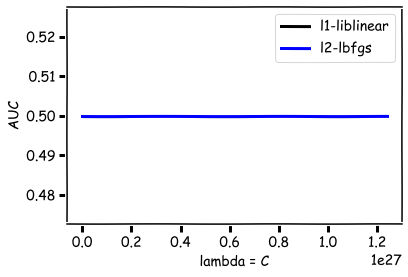

[array([-0.0265572 ,  3.82130422, -0.01678648]),
 array([-0.02656618,  5.42398285, -0.02712976]),
 array([-0.02665103,  5.40968236, -0.02703348]),
 array([-0.02656156,  5.42562736, -0.02714027]),
 array([-0.02665088,  5.4098279 , -0.02703439]),
 array([-0.02665142,  5.40962753, -0.02703314]),
 array([-0.02664977,  5.40986422, -0.0270347 ]),
 array([-0.02665072,  5.40974292, -0.02703385]),
 array([-0.02663983,  5.41186231, -0.02704808]),
 array([-0.02664761,  5.41030039, -0.02703763])]

In [91]:
beta1_l1 = []
beta1_l2 = []
Cs = []
AUC1s = []
AUC2s =[]
data_x = df_heart[['MaxHR','Sex','Interaction']]
data_y = df_heart['AHD']

for i in range(10):
    C = 2**(10*i)
    logitm_l1 = LogisticRegression(C = C, penalty = "l1", solver='liblinear',max_iter=200)
    logitm_l1.fit (data_x, data_y)
    logitm_l2 = LogisticRegression(C = C, penalty = "l2", solver='lbfgs')
    logitm_l2.fit (data_x, data_y)
    beta1_l1.append(logitm_l1.coef_[0])
    beta1_l2.append(logitm_l2.coef_[0])
    Cs.append(C)
    y_hat1 = logitm_l1.predict_proba(df_heart[['Sex','MaxHR','Interaction']])[:,1]

    AUC1s.append(met.roc_auc_score(df_heart['AHD'], y_hat1))
    y_hat2 = logitm_l2.predict_proba(df_heart[['Sex','MaxHR','Interaction']])[:,1]

    AUC2s.append(met.roc_auc_score(df_heart['AHD'], y_hat2))
    
plt.plot(np.array(Cs), AUC1s,  color='black', lw=3, label = "l1-liblinear")
plt.plot(np.array(Cs), AUC2s,  color='blue', lw=3, label ="l2-lbfgs")
plt.xlabel ("lambda = C")
plt.ylabel("AUC")
plt.legend()
plt.show()
beta1_l1

In [79]:
10**(-1)

0.1